## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
data = pd.read_csv('crime_data.csv')
print(data.shape)
data.head()

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.rename( columns={'Unnamed: 0':'states'}, inplace=True )

In [5]:
data.head()

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
del data['states']

## Data Exploration

In [7]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [9]:
data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data[data.duplicated()]

,Murder,Assault,UrbanPop,Rape


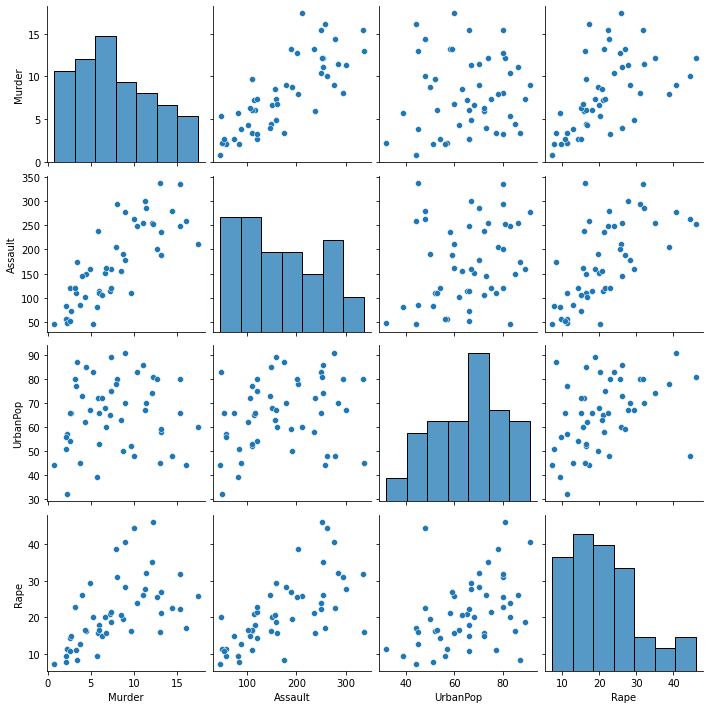

In [12]:
sns.pairplot(data)

Unique points in this correlation matrix:

    Assault is positively correlated with Murder
    Assualt is positively correlated with Rape
    Rape is positively correlated with Murder

In [13]:
print('Top 10 States with Highest Murder Rate')
data.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,Murder,Assault,UrbanPop,Rape
9,17.4,211,60,25.8
23,16.1,259,44,17.1
8,15.4,335,80,31.9
17,15.4,249,66,22.2
39,14.4,279,48,22.5
0,13.2,236,58,21.2
41,13.2,188,59,26.9
32,13.0,337,45,16.1
42,12.7,201,80,25.5
27,12.2,252,81,46.0


In [14]:
print('Top 10 States with Lowest Murder Rate')
data.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,Murder,Assault,UrbanPop,Rape
33,0.8,45,44,7.3
28,2.1,57,56,9.5
18,2.1,83,51,7.8
14,2.2,56,57,11.3
44,2.2,48,32,11.2
48,2.6,53,66,10.8
11,2.6,120,54,14.2
22,2.7,72,66,14.9
43,3.2,120,80,22.9
6,3.3,110,77,11.1


In [15]:
print('Top 10 States with Highest Urban Population Rate')
data.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


,Murder,Assault,UrbanPop,Rape
0,9.0,276,91,40.6
1,7.4,159,89,18.8
2,3.4,174,87,8.3
3,11.1,254,86,26.1
4,4.4,149,85,16.3
5,5.3,46,83,20.2
6,10.4,249,83,24.0
7,12.2,252,81,46.0
8,12.7,201,80,25.5
9,8.1,294,80,31.0


In [16]:
print('Top 10 States with Lowest Urban Population Rate')
data.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


,Murder,Assault,UrbanPop,Rape
0,2.2,48,32,11.2
1,5.7,81,39,9.3
2,0.8,45,44,7.3
3,16.1,259,44,17.1
4,3.8,86,45,12.8
5,13.0,337,45,16.1
6,10.0,263,48,44.5
7,14.4,279,48,22.5
8,8.8,190,50,19.5
9,2.1,83,51,7.8


## Normalizing the data

In [17]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(50, 4)

In [18]:
columns = data.columns
columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

## Hierarchical Clustering Algorithm

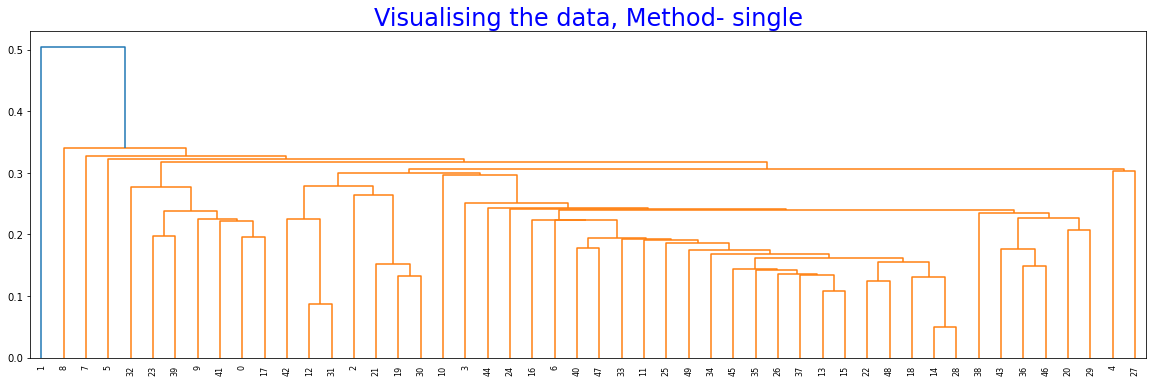

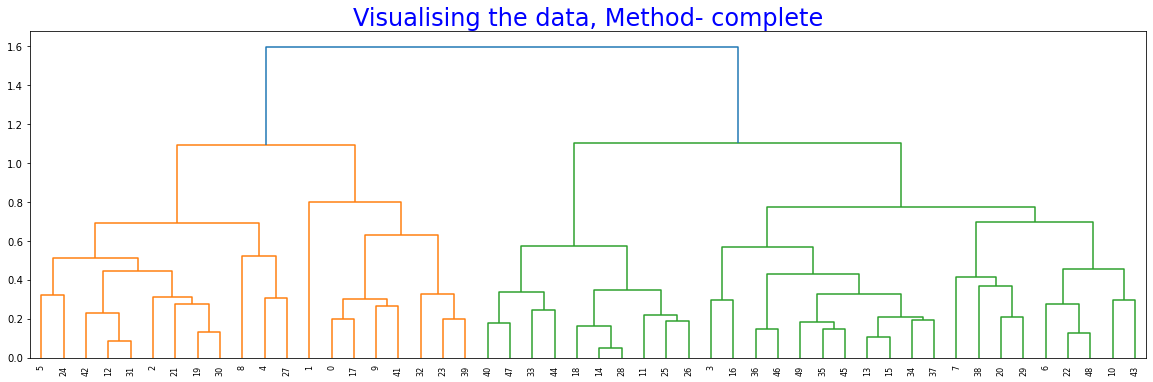

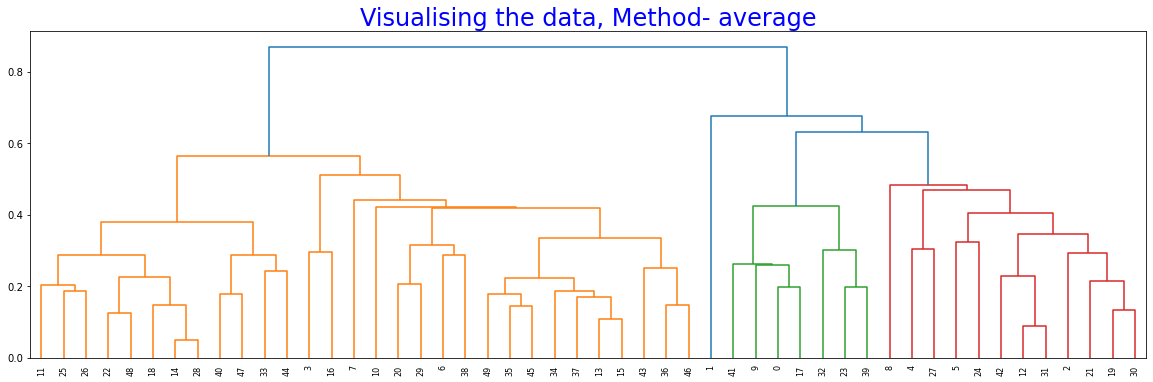

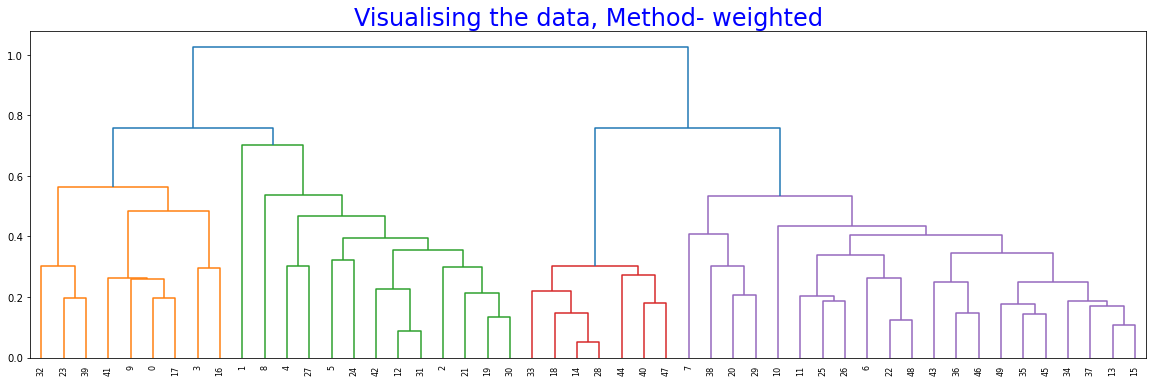

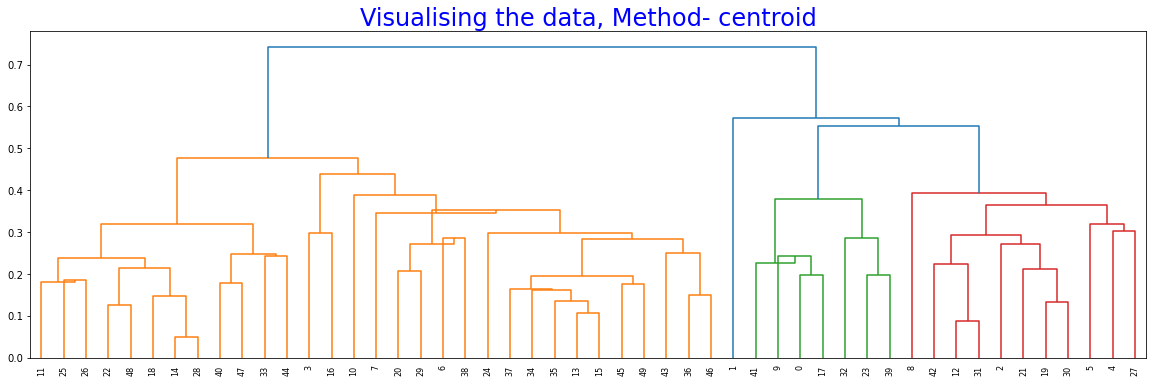

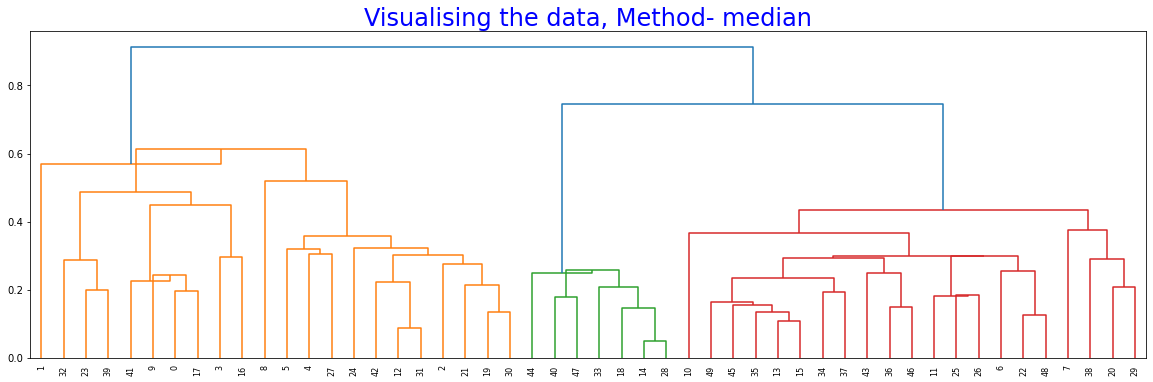

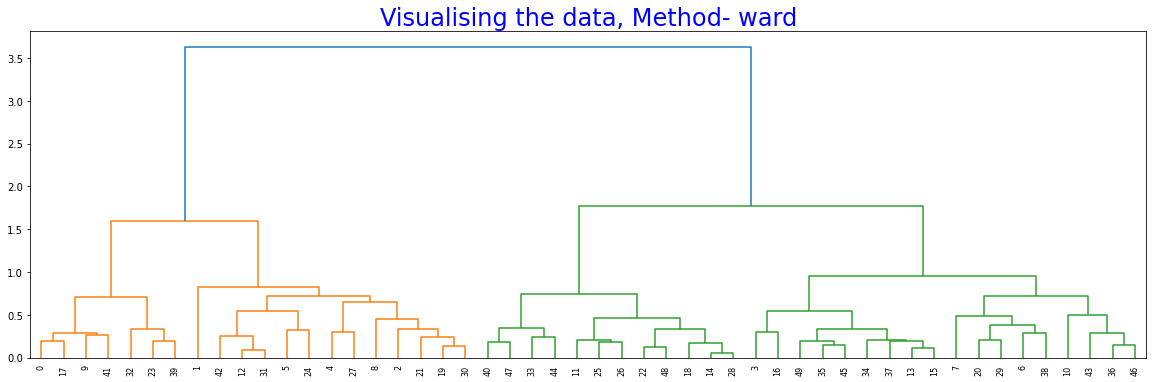

In [19]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [20]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [21]:
y_hc = hc.fit_predict(minmax_df)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [23]:
crime_data = data.copy()

In [24]:
crime_data['clusters'] = Clusters

In [25]:
crime_data

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [26]:
crime_data[crime_data['clusters'] == 0]

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
9,17.4,211,60,25.8,0
10,5.3,46,83,20.2,0
11,2.6,120,54,14.2,0
12,10.4,249,83,24.0,0


In [28]:
crime_data[crime_data['clusters'] == 1]

,Murder,Assault,UrbanPop,Rape,clusters
7,5.9,238,72,15.8,1


In [29]:
crime_data[crime_data['clusters'] == 2]

,Murder,Assault,UrbanPop,Rape,clusters
8,15.4,335,80,31.9,2


In [30]:
crime_data[crime_data['clusters'] == 3]

,Murder,Assault,UrbanPop,Rape,clusters
1,10.0,263,48,44.5,3


## KMeans

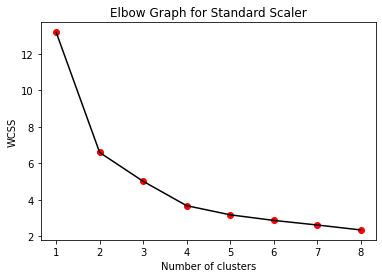

In [32]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans_cluster = KMeans(n_clusters=4)
kmeans_cluster.fit(minmax_df)
prediction = kmeans_cluster.predict(minmax_df)

In [35]:
prediction

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 3, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [37]:
clusters_kmeans=pd.DataFrame(prediction,columns=['Clusters'])
clusters_kmeans

,Clusters
0,2
1,3
2,3
3,2
4,3
5,3
6,0
7,0
8,3
9,2


In [41]:
crime_data_km = data.copy()

In [42]:
crime_data_km['kmeans_cluster'] = clusters_kmeans

In [43]:
crime_data_km

,Murder,Assault,UrbanPop,Rape,kmeans_cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,2


In [44]:
crime_data_km[crime_data_km['kmeans_cluster'] == 0]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
10,5.3,46,83,20.2,0
13,7.2,113,65,21.0,0
15,6.0,115,66,18.0,0
20,4.4,149,85,16.3,0
29,7.4,159,89,18.8,0
34,7.3,120,75,21.4,0
35,6.6,151,68,20.0,0
36,4.9,159,67,29.3,0


In [45]:
crime_data_km[crime_data_km['kmeans_cluster'] == 1]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster
11,2.6,120,54,14.2,1
14,2.2,56,57,11.3,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1
22,2.7,72,66,14.9,1
25,6.0,109,53,16.4,1
26,4.3,102,62,16.5,1
28,2.1,57,56,9.5,1
33,0.8,45,44,7.3,1
40,3.8,86,45,12.8,1


In [46]:
crime_data_km[crime_data_km['kmeans_cluster'] == 2]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster
0,13.2,236,58,21.2,2
3,8.8,190,50,19.5,2
9,17.4,211,60,25.8,2
17,15.4,249,66,22.2,2
23,16.1,259,44,17.1,2
32,13.0,337,45,16.1,2
39,14.4,279,48,22.5,2
41,13.2,188,59,26.9,2


In [47]:
crime_data_km[crime_data_km['kmeans_cluster'] == 3]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
8,15.4,335,80,31.9,3
12,10.4,249,83,24.0,3
19,11.3,300,67,27.8,3
21,12.1,255,74,35.1,3
24,9.0,178,70,28.2,3
27,12.2,252,81,46.0,3


## DBScan clustering

In [48]:
dbs = DBSCAN(eps=0.3, min_samples=3)
dbs.fit(minmax_df)

DBSCAN(eps=0.3, min_samples=3)

In [49]:
dbs_clusters = dbs.labels_
dbs_clusters

array([ 0, -1,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [50]:
crime_data_db = crime_data.copy()

In [51]:
crime_data_db['dbs_clusters'] = dbs_clusters

In [52]:
crime_data_db

,Murder,Assault,UrbanPop,Rape,clusters,dbs_clusters
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,3,-1
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,0,1
4,9.0,276,91,40.6,0,-1
5,7.9,204,78,38.7,0,-1
6,3.3,110,77,11.1,0,1
7,5.9,238,72,15.8,1,-1
8,15.4,335,80,31.9,2,-1
9,17.4,211,60,25.8,0,0
